# Documentation
This code is designed to run on an Agroscope VM. It takes an input file (like the one below) where images are picked for annotations, and gather them in a single file.


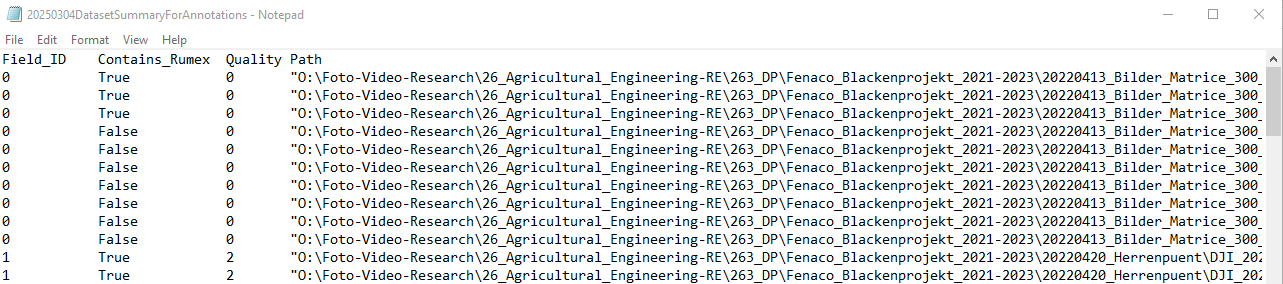

In [ ]:
import os
import pandas as pd

In [ ]:
# Set up the path provided by Ralph
path = r"O:/Foto-Video-Research/26_Agricultural_Engineering-RE/263_DP/Fenaco_Blackenprojekt_2021-2023/20250304DatasetSummaryForAnnotations.txt"

# Read the text file in a pandas dataframe
df = pd.read_csv(path, sep = '\s+')


dataset_names = [i.split('\\')[5] for i in df['Path']]
dataset_names = set(dataset_names)
dataset_names = list(dataset_names)

dataset_names

In [ ]:
# Loop over the datasets
path = r"O:\Foto-Video-Research\26_Agricultural_Engineering-RE\263_DP\Fenaco_Blackenprojekt_2021-2023\Temp"
if not os.path.exists(path):
    os.makedirs(path)

for d in dataset_names:
    filtered_df = df[df['Path'].str.contains(d)]
    filtered_df = filtered_df.reset_index(drop=True)

    path_df = os.path.join(path, d)
    if not os.path.exists(path_df):
        os.makedirs(path_df)
    
    # Loop over the images in the dataset and copy them into the corresponding folder
    for i in range(filtered_df.shape[0]):
        img_path = filtered_df['Path'][i]
        img_name = img_path.split('\\')[-1]
        img_dest = os.path.join(path_df, img_name)
        os.system(f'copy "{img_path}" "{img_dest}"')
